Primero se importarán las herramientas que serán utilizadas para el análisis de datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import funciones.paths as paths

**Archivo imágenes clasificadas**

Lo primero que haremos es obtener el Data Frame a partir del archivo de imágenes etiquetadas.


In [2]:
df = pd.read_csv(paths.DIR_ETIQUETAR)
df

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09


-*Gráfico de torta que muestre los porcentajes según el tipo de imagen*

Creamos una serie con la información de los tipos de las imágenes.

In [3]:
serie_tipos = df.groupby(df['Tipo']).size()
serie_tipos

Tipo
JPEG    8
PNG     1
WEBP    1
dtype: int64

Creamos una lista de etiquetas en el que se muestra cada tipo de imagen utilizada

In [4]:
etiquetas = list(serie_tipos.index)
etiquetas

['JPEG', 'PNG', 'WEBP']

Luego de obtener la serie realizamos el gráfico de torta que muestre los porcentajes según el tipo de imagen

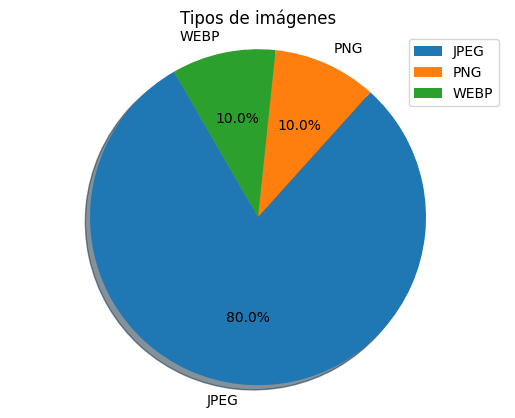

In [5]:
plt.pie(serie_tipos, labels= etiquetas, autopct='%1.1f%%', shadow= True, startangle=120, labeldistance= 1.1)
plt.axis('equal')
plt.legend(etiquetas)
plt.title('Tipos de imágenes')
plt.show()

-*Calcular los valores máximos de ancho y de alto de las imágenes clasificada*

Creamos una Data Frame con la resolución de las imágenes, divididos por ancho y alto

In [6]:
df_resoluciones = df['Resolucion'].str.split(',', expand=True)
df_resoluciones.columns = ('Ancho', 'Alto')
df_resoluciones


,Ancho,Alto
0,(640,359)
1,(1280,797)
2,(265,190)
3,(275,183)
4,(1024,500)
5,(1280,720)
6,(284,177)
7,(600,374)
8,(1000,643)
9,(640,360)


Eliminamos los paréntesis de apertura y cierre en el Data Frame

In [7]:
df_resoluciones['Ancho'] = df_resoluciones['Ancho'].str[1:]
df_resoluciones['Alto'] = df_resoluciones['Alto'].str[:-1]
df_resoluciones

,Ancho,Alto
0,640,359
1,1280,797
2,265,190
3,275,183
4,1024,500
5,1280,720
6,284,177
7,600,374
8,1000,643
9,640,360


Pasamos el Data Frame a enteros y obtenemos los máximos

In [8]:
df_resoluciones['Ancho'] = df_resoluciones['Ancho'].astype(int)
df_resoluciones['Alto'] = df_resoluciones['Alto'].astype(int)
print(f'Máximo ancho: {df_resoluciones["Ancho"].max()} px \nMáximo alto: {df_resoluciones["Alto"].max()} px')


Máximo ancho: 1280 px 
Máximo alto: 797 px


-*Generar un gráfico de dispersión para visualizar la relación entre el ancho y el alto de las imágenes.*

Se asocia a la variable x los valores del ancho de las imágenes etiquetadas y a la variable y los valores del alto de las mismas

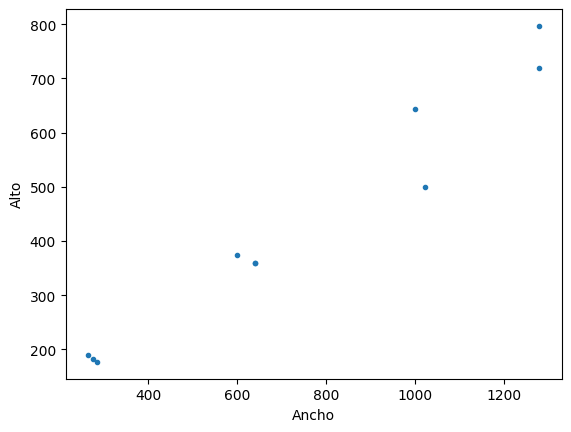

In [9]:
x = df_resoluciones['Ancho']
y = df_resoluciones['Alto']
fig, ax = plt.subplots()
ax.scatter(x, y, marker = ".")
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()


-*En base a la fecha de última actualización, cantidad de cambios realizados para cada día de la semana (posible gráfico de torta o barras).*

Se importa datetime y se crea una nueva columna en el Data Frame llamada Fecha

In [10]:
from datetime import datetime

df['Hora'] = round(df['Hora'])
df['Fecha'] = df['Hora'].apply(lambda x: datetime.fromtimestamp(x))
df

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora,Fecha
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09,2023-06-19 02:55:27
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09,2023-06-19 02:55:42
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09,2023-06-19 02:55:53
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09,2023-06-19 02:56:09
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09,2023-06-19 02:56:29
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09,2023-06-19 02:56:52
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09,2023-06-19 02:57:33
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09,2023-06-19 02:57:44
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09,2023-06-19 02:58:22
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09,2023-06-19 02:59:01


Se crea una columna para dia de la semana

In [11]:
df['Dia_semana'] = df['Fecha'].dt.day_name()
df

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora,Fecha,Dia_semana
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09,2023-06-19 02:55:27,Monday
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09,2023-06-19 02:55:42,Monday
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09,2023-06-19 02:55:53,Monday
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09,2023-06-19 02:56:09,Monday
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09,2023-06-19 02:56:29,Monday
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09,2023-06-19 02:56:52,Monday
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09,2023-06-19 02:57:33,Monday
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09,2023-06-19 02:57:44,Monday
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09,2023-06-19 02:58:22,Monday
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09,2023-06-19 02:59:01,Monday


Se crea un gráfico de barras con los días de la semana en los que se realizó algún etiquetado de imagen

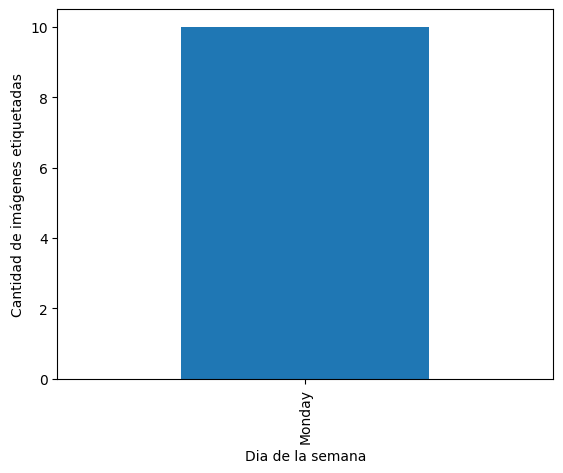

In [12]:
dias_semana = df["Dia_semana"].value_counts()
dias_semana.plot(kind="bar")
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de imágenes etiquetadas')
plt.show()

-*Crear un gráfico de líneas para visualizar la evolución de la cantidad de actualizaciones a lo largo del tiempo.*

Creo una nueva columna en el Data Frame en la que solo aparezca el dia (año, mes, dia)

In [13]:
df['Dia'] = df['Fecha'].dt.date
df

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora,Fecha,Dia_semana,Dia
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09,2023-06-19 02:55:27,Monday,2023-06-19
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09,2023-06-19 02:55:42,Monday,2023-06-19
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09,2023-06-19 02:55:53,Monday,2023-06-19
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09,2023-06-19 02:56:09,Monday,2023-06-19
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09,2023-06-19 02:56:29,Monday,2023-06-19
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09,2023-06-19 02:56:52,Monday,2023-06-19
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09,2023-06-19 02:57:33,Monday,2023-06-19
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09,2023-06-19 02:57:44,Monday,2023-06-19
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09,2023-06-19 02:58:22,Monday,2023-06-19
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09,2023-06-19 02:59:01,Monday,2023-06-19


Creo el grafico de lineas utilizando la columna creada anteriormente

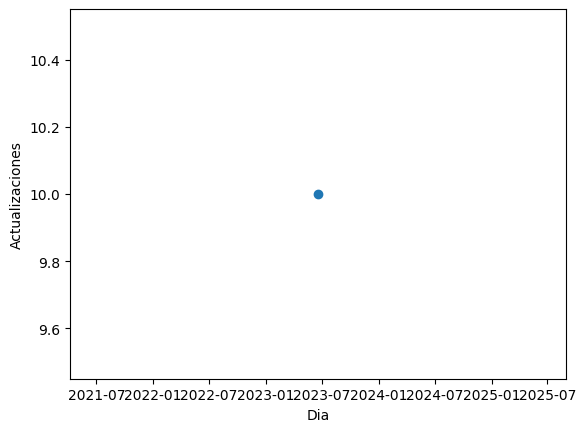

In [14]:
dias = df['Dia'].value_counts()
valoresX = df['Dia'].value_counts()
valoresY = df['Dia'].unique()
fig, ax = plt.subplots()
ax.plot(valoresY, valoresX, marker = "o")
plt.xlabel('Dia')
plt.ylabel('Actualizaciones')
plt.show()

-*Con la lista de tags generar una nube de palabras*

Importo el modulo wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS

Creo una copia del Data Frame para generar una nube de palabras

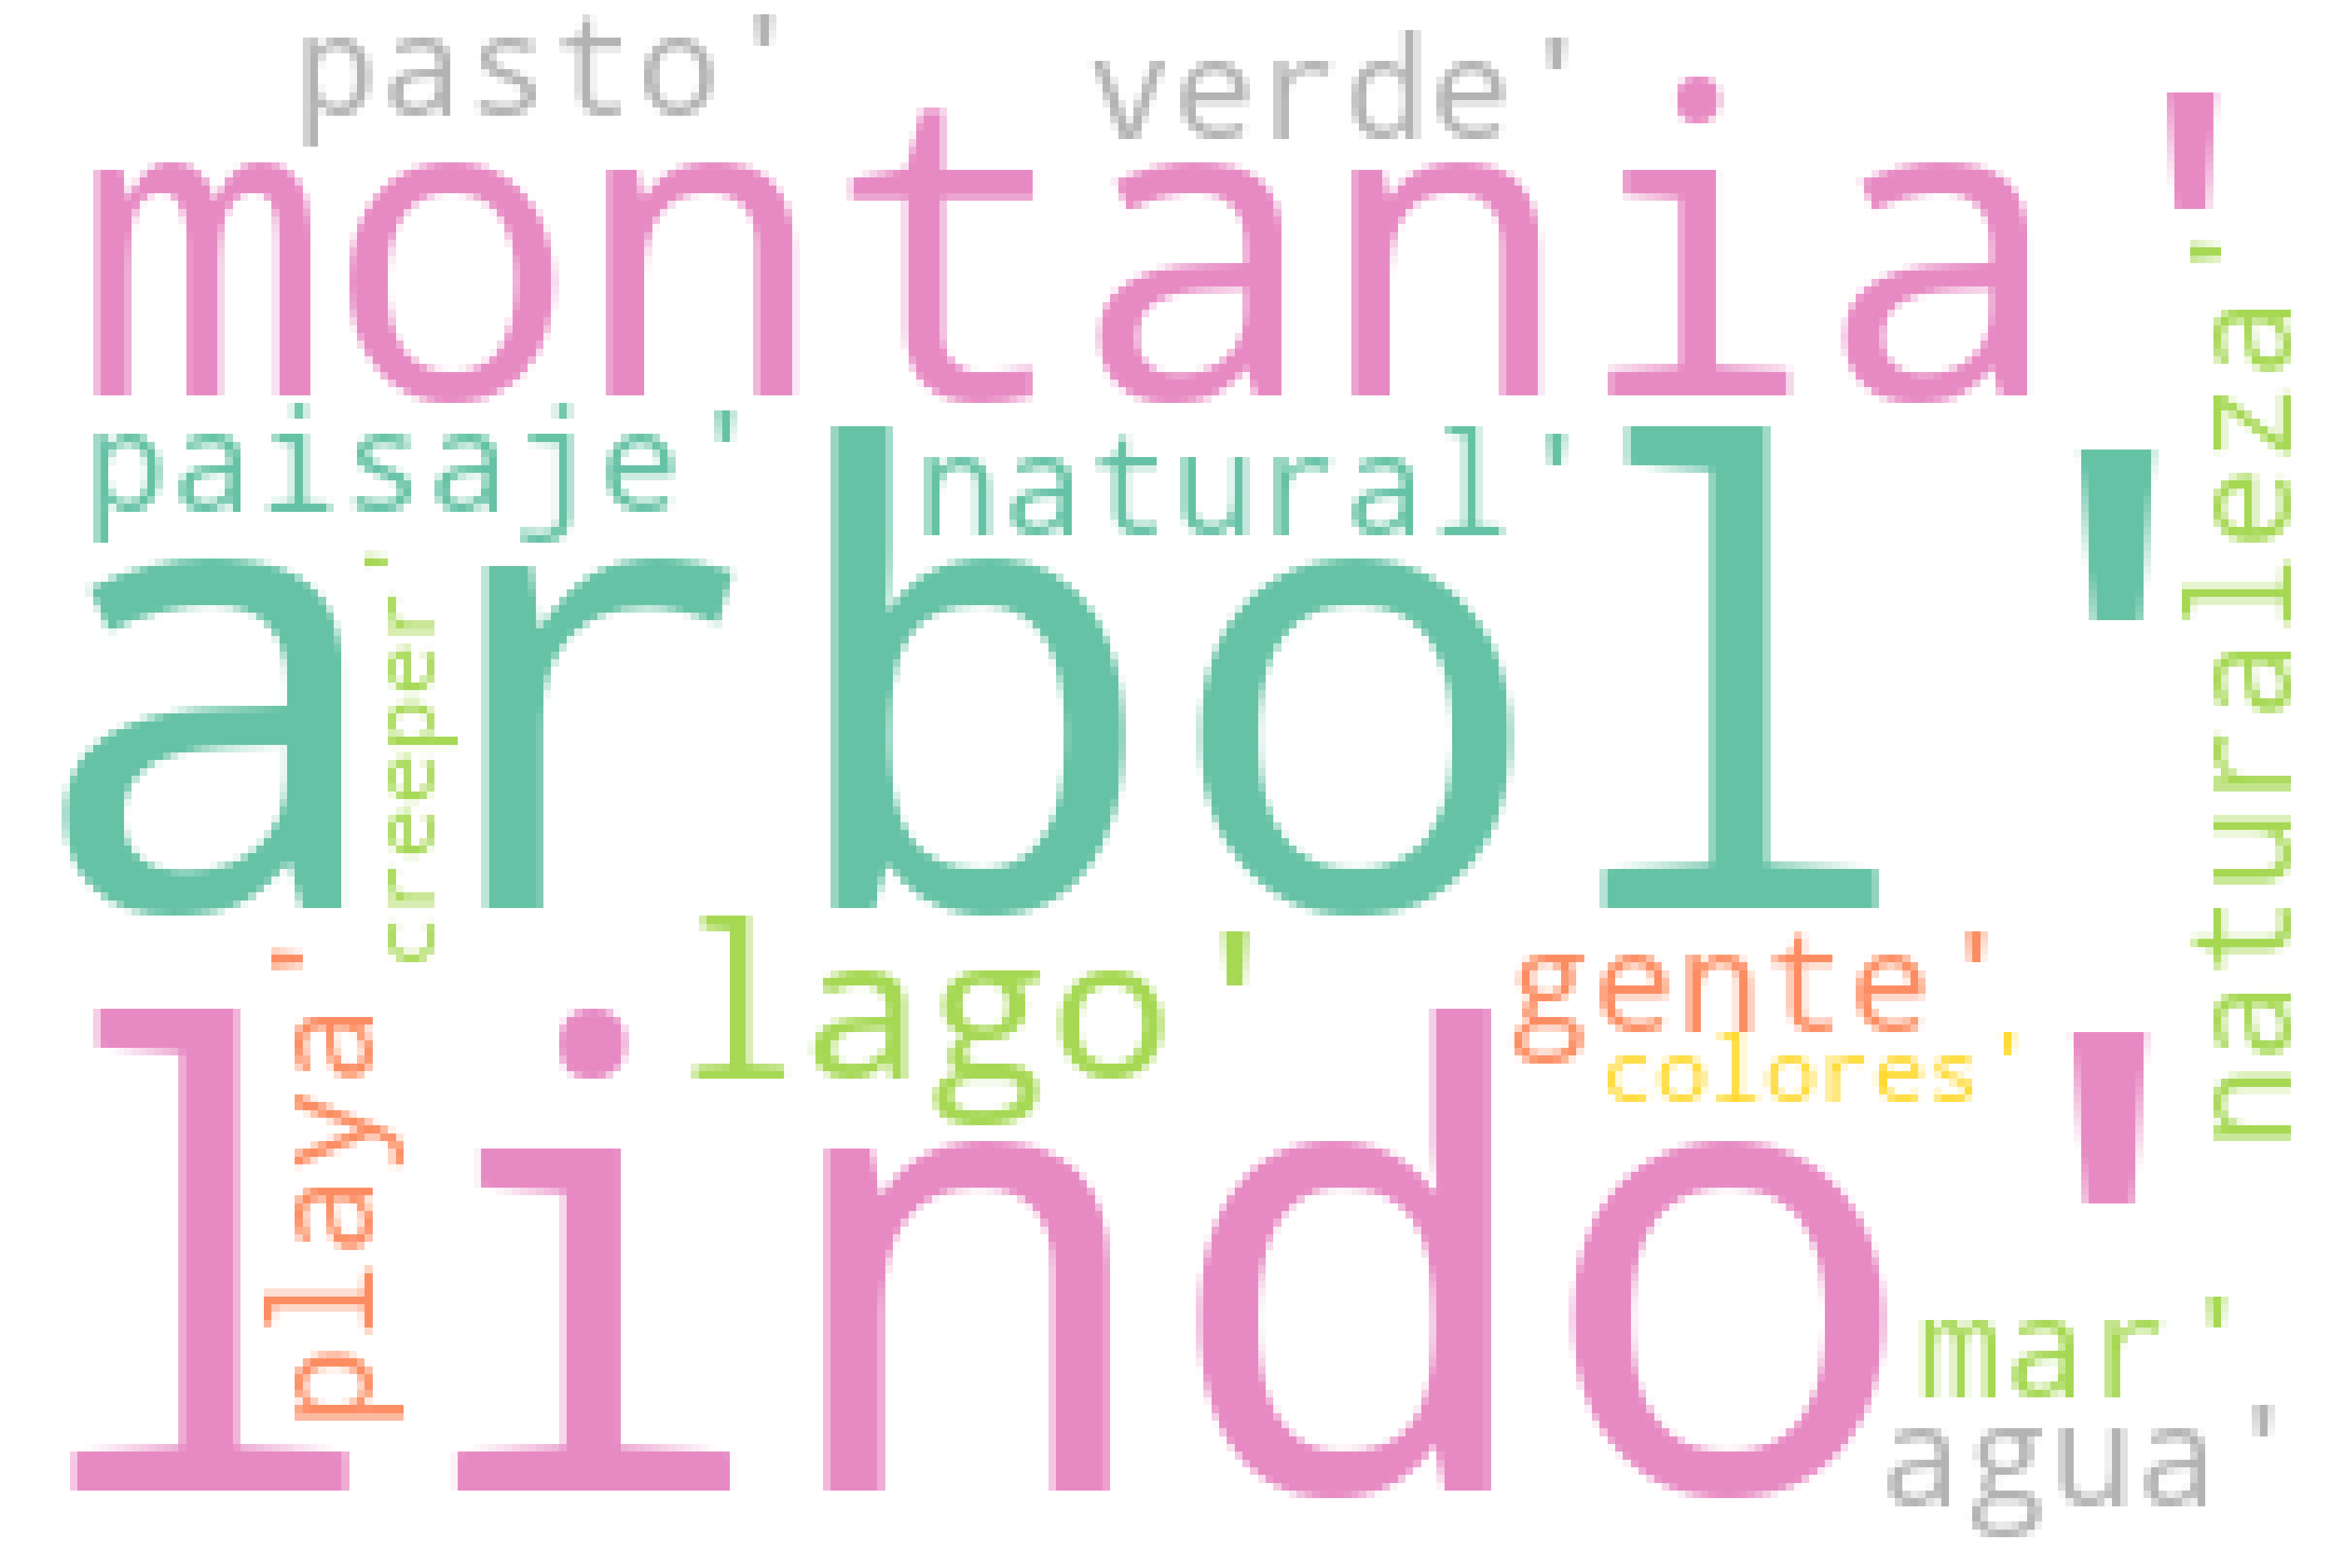

In [16]:
df_nube= df.copy()
df_nube['Tags'] = df['Tags'].str.split(';')
nube_tags = df_nube['Tags'].explode().unique()
text = str(nube_tags)
wordcloud = WordCloud(width = 300, height = 200, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


-*Informar cuáles son los 3 tags más utilizados*

In [17]:
df2= df.copy()
df2['Tags'] = df['Tags'].str.split(';')
tags = df2['Tags'].explode()
df_tags = pd.DataFrame(data=tags)
contador_tags = df_tags.groupby(['Tags']).value_counts().sort_values(ascending= False).head(3)
df_hola = pd.DataFrame(data=contador_tags)
df_hola

,count
Tags,
arbol,2
lindo,2
agua,1


-*Calcular el tamaño en bytes promedio de las imágenes actualizadas por cada perfil, incluir los perfiles que no hayan realizado actualizaciones.*

Primero creamos el Data Frame de los perfiles

In [18]:
df_perfiles = pd.read_json(paths.DIR_USER)
df_perfiles

,Nombre,nick,Edad,Genero,foto
0,messi,messi,36,Hombre,imagenes/avatares/avatar_messi.png
1,otamendi,otamendi,21,Hombre,imagenes/avatares/avatar_otamendi.png
2,lauta,lauta,23,nobinario,imagenes/avatares/avatar_lauta.png
3,ale,garnacho,19,Mujer,imagenes/avatares/avatar_garnacho.png
4,dibu,dibu,30,Hombre,imagenes/avatares/avatar_dibu.png
5,licha,licha,23,Hombre,imagenes/avatares/avatar_licha.png


Se hace un merge entre todos los perfiles y el archivo de etiquetar imágenes

In [19]:
outer_join = pd.merge(df, df_perfiles, on= 'nick', how= 'outer')
outer_join = outer_join.fillna(0)
outer_join

,Ruta,Descripcion,Resolucion,Tamanio,Tipo,Tags,nick,Hora,Fecha,Dia_semana,Dia,Nombre,Edad,Genero,foto
0,directorios_entrega/etiquetar_imagenes/landsca...,arbol,"(640, 359)",96732,JPEG,arbol;lindo,messi,1.687154e+09,2023-06-19 02:55:27,Monday,2023-06-19,messi,36,Hombre,imagenes/avatares/avatar_messi.png
1,directorios_entrega/etiquetar_imagenes/tree-73...,paisaje arbol,"(1280, 797)",185491,JPEG,lindo;arbol,messi,1.687154e+09,2023-06-19 02:55:42,Monday,2023-06-19,messi,36,Hombre,imagenes/avatares/avatar_messi.png
2,directorios_entrega/etiquetar_imagenes/imagsas...,montanias,"(265, 190)",10758,JPEG,montania;lago,messi,1.687154e+09,2023-06-19 02:55:53,Monday,2023-06-19,messi,36,Hombre,imagenes/avatares/avatar_messi.png
3,directorios_entrega/etiquetar_imagenes/dsasasa...,cascada,"(275, 183)",9098,JPEG,paisaje;natural,otamendi,1.687154e+09,2023-06-19 02:56:09,Monday,2023-06-19,otamendi,21,Hombre,imagenes/avatares/avatar_otamendi.png
4,directorios_entrega/etiquetar_imagenes/blog_fo...,lagos,"(1024, 500)",209234,JPEG,gente;naturaleza,otamendi,1.687154e+09,2023-06-19 02:56:29,Monday,2023-06-19,otamendi,21,Hombre,imagenes/avatares/avatar_otamendi.png
5,directorios_entrega/etiquetar_imagenes/playa-d...,playa,"(1280, 720)",101037,JPEG,mar;playa,lauta,1.687154e+09,2023-06-19 02:56:52,Monday,2023-06-19,lauta,23,nobinario,imagenes/avatares/avatar_lauta.png
6,directorios_entrega/etiquetar_imagenes/descarg...,paisajenatural,"(284, 177)",8947,JPEG,pasto;verde,garnacho,1.687154e+09,2023-06-19 02:57:33,Monday,2023-06-19,ale,19,Mujer,imagenes/avatares/avatar_garnacho.png
7,directorios_entrega/etiquetar_imagenes/deposit...,cascadas,"(600, 374)",84376,WEBP,agua,garnacho,1.687154e+09,2023-06-19 02:57:44,Monday,2023-06-19,ale,19,Mujer,imagenes/avatares/avatar_garnacho.png
8,directorios_entrega/etiquetar_imagenes/photo-1...,montaniacolores,"(1000, 643)",70755,JPEG,colores,dibu,1.687154e+09,2023-06-19 02:58:22,Monday,2023-06-19,dibu,30,Hombre,imagenes/avatares/avatar_dibu.png
9,directorios_entrega/etiquetar_imagenes/zea7uxr...,minecraft,"(640, 360)",436666,PNG,creeper,licha,1.687154e+09,2023-06-19 02:59:01,Monday,2023-06-19,licha,23,Hombre,imagenes/avatares/avatar_licha.png


Agrupo por el Data Frame por nick y hago un promedio del tamaño

In [20]:
promedio_tamanio_por_nick = outer_join.groupby('nick')['Tamanio'].mean()
promedio_tamanio_por_nick

nick
dibu         70755.000000
garnacho     46661.500000
lauta       101037.000000
licha       436666.000000
messi        97660.333333
otamendi    109166.000000
Name: Tamanio, dtype: float64

**Archivo log del sistema**
